In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings

warnings.filterwarnings("ignore")

2025-12-08 07:48:41.225944: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-08 07:48:41.226082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-08 07:48:41.231460: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-12-08 07:48:41.264882: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-08 07:48:49.673181: W tensorflow/compiler/tf2

In [2]:
## Run the NVIDIA System Management Interface provided by provided by NVIDIA for 
# monitoring and managing NVIDIA GPU devices 
!nvidia-smi

Mon Dec  8 07:48:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.124.06             Driver Version: 570.124.06     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce MX130           Off |   00000000:02:00.0 Off |                  N/A |
| N/A   48C    P8            N/A  /  200W |       7MiB /   2048MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Set seeds

import random

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [4]:
# Check for dataset files
!ls "datasets/Edge-IIoTset/"

 Backdoor.csv		  'OS Fingerprinting.csv'  'SQL Injection.csv'
'Benign Traffic.csv'	  'Password Attack.csv'    'Uploading Attack.csv'
'DDoS HTTP Flood.csv'	  'Port Scanning.csv'	   'Vulnerability Scanner.csv'
'DDoS TCP SYN Flood.csv'   Ransomware.csv	    XSS.csv


In [5]:
# From the above, dataset is saved in 12 CSV files in the "datasets/Edge-IIoTset/" directory
# Walk through the directory to the directory to retrieve all the csv files

import os
import sys


def walk_directory(directory):
    """This function walks through a directory and retrieve all csv files"""
    csv_files = [
        os.path.join(root, file)
        for root, dirs, files in os.walk(directory)
        for file in files if file.endswith(".csv")
    ]
    return csv_files

In [6]:
# Read all files using the function
files = walk_directory(directory="datasets/Edge-IIoTset/")
files

['datasets/Edge-IIoTset/DDoS TCP SYN Flood.csv',
 'datasets/Edge-IIoTset/Uploading Attack.csv',
 'datasets/Edge-IIoTset/XSS.csv',
 'datasets/Edge-IIoTset/DDoS HTTP Flood.csv',
 'datasets/Edge-IIoTset/Password Attack.csv',
 'datasets/Edge-IIoTset/OS Fingerprinting.csv',
 'datasets/Edge-IIoTset/Backdoor.csv',
 'datasets/Edge-IIoTset/Port Scanning.csv',
 'datasets/Edge-IIoTset/Vulnerability Scanner.csv',
 'datasets/Edge-IIoTset/Ransomware.csv',
 'datasets/Edge-IIoTset/Benign Traffic.csv',
 'datasets/Edge-IIoTset/SQL Injection.csv']

In [7]:
# Read and concatenate each file into a Pandas DataFrame

df = pd.concat([pd.read_csv(file) for file in files],
              axis=0, ignore_index=True)

In [8]:
# Display the first five samples
df.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Flow_Duration,Total_Fwd_Packet,Total_Bwd_packets,Total_Length_of_Fwd_Packet,Total_Length_of_Bwd_Packet,...,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack_Name,Label,day_of_week,hour,time_elapsed
0,4119640366,33410,3232235648,80,6,70,1,1,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,DDoS TCP SYN Flood,1,2,14,285507.0
1,2548826374,33411,3232235648,80,6,21,1,1,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,DDoS TCP SYN Flood,1,2,14,285507.0
2,3340907903,33412,3232235648,80,6,20,1,1,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,DDoS TCP SYN Flood,1,2,14,285507.0
3,2069567925,33413,3232235648,80,6,19,1,1,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,DDoS TCP SYN Flood,1,2,14,285507.0
4,1318530572,33416,3232235648,80,6,27,1,1,120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,DDoS TCP SYN Flood,1,2,14,285507.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3178076 entries, 0 to 3178075
Data columns (total 86 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Src_IP                      int64  
 1   Src_Port                    int64  
 2   Dst_IP                      int64  
 3   Dst_Port                    int64  
 4   Protocol                    int64  
 5   Flow_Duration               int64  
 6   Total_Fwd_Packet            int64  
 7   Total_Bwd_packets           int64  
 8   Total_Length_of_Fwd_Packet  float64
 9   Total_Length_of_Bwd_Packet  float64
 10  Fwd_Packet_Length_Max       float64
 11  Fwd_Packet_Length_Min       float64
 12  Fwd_Packet_Length_Mean      float64
 13  Fwd_Packet_Length_Std       float64
 14  Bwd_Packet_Length_Max       float64
 15  Bwd_Packet_Length_Min       float64
 16  Bwd_Packet_Length_Mean      float64
 17  Bwd_Packet_Length_Std       float64
 18  Flow_Bytes/s                float64
 19  Flow_Packets/s       

In [10]:
### Take only 1000000 sample
df = df.sample(n=1000000, 
               random_state=SEED).sample(frac=1).reset_index(drop=True)

In [11]:
### Get statistical description of numeric features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Src_IP,1000000.0,2.944666e+09,7.998819e+08,1.684404e+07,3.232236e+09,3.232237e+09,3.232237e+09,4.278124e+09
Src_Port,1000000.0,4.976096e+04,1.522961e+04,0.000000e+00,4.921275e+04,5.428600e+04,5.980500e+04,6.553500e+04
Dst_IP,1000000.0,3.232232e+09,1.705021e+06,2.398800e+09,3.232236e+09,3.232236e+09,3.232237e+09,3.232238e+09
Dst_Port,1000000.0,1.357137e+03,2.115546e+03,8.000000e+01,8.000000e+01,1.883000e+03,1.883000e+03,6.553500e+04
Protocol,1000000.0,6.000000e+00,0.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
...,...,...,...,...,...,...,...,...
Idle_Min,1000000.0,2.371708e+04,4.922929e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.432782e+07
Label,1000000.0,3.382590e-01,4.731174e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
day_of_week,1000000.0,1.648400e+00,1.408563e+00,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00
hour,1000000.0,1.305045e+01,7.391413e+00,0.000000e+00,8.000000e+00,1.400000e+01,1.900000e+01,2.300000e+01


In [12]:
df.describe(exclude=np.number)

,Attack_Name
count,1000000
unique,12
top,Benign Traffic
freq,661741


In [13]:
# Get the distribution of labels in the dataframe
df.Label.value_counts()

Label
0    661741
1    338259
Name: count, dtype: int64

In [14]:
### Get the distribution of attacks in the dataframe for multiclass classification
class_counts = df.Attack_Name.value_counts()
class_counts

Attack_Name
Benign Traffic           661741
DDoS TCP SYN Flood       265212
Password Attack           56323
DDoS HTTP Flood            4960
Port Scanning              3086
Uploading Attack           2969
SQL Injection              2706
Vulnerability Scanner      1739
XSS                         754
Backdoor                    268
Ransomware                  197
OS Fingerprinting            45
Name: count, dtype: int64

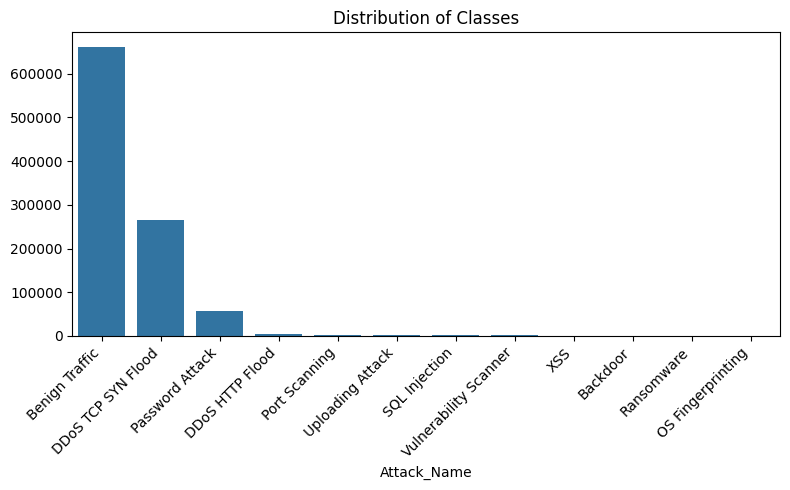

In [15]:
### Visualise the number of samples belonging to each attack

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribution of Classes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("edge_iiotset_class_distributions.png", dpi=400)
plt.show()

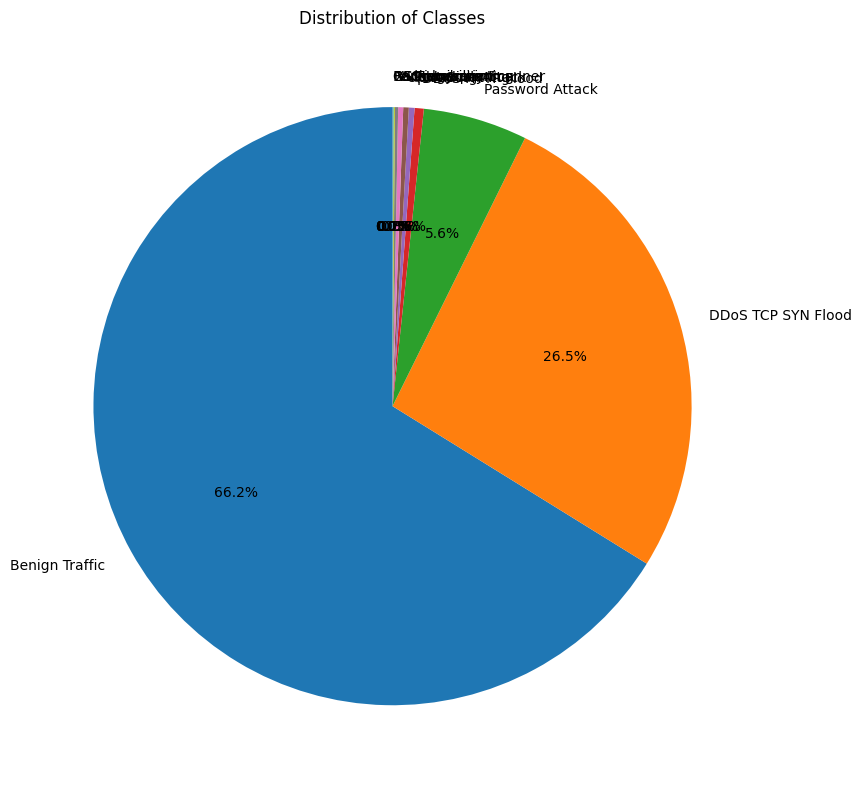

In [16]:
### Create a pie chart to understand the percentage distributions

plt.figure(figsize=(12, 8))
plt.pie(
    x=class_counts.values,
    labels=class_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribution of Classes")
plt.tight_layout()
plt.show()

### Preprocessing the Dataset

In [17]:
# Drop the "Label" column
df.drop("Label", axis=1, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 85 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Src_IP                      1000000 non-null  int64  
 1   Src_Port                    1000000 non-null  int64  
 2   Dst_IP                      1000000 non-null  int64  
 3   Dst_Port                    1000000 non-null  int64  
 4   Protocol                    1000000 non-null  int64  
 5   Flow_Duration               1000000 non-null  int64  
 6   Total_Fwd_Packet            1000000 non-null  int64  
 7   Total_Bwd_packets           1000000 non-null  int64  
 8   Total_Length_of_Fwd_Packet  1000000 non-null  float64
 9   Total_Length_of_Bwd_Packet  1000000 non-null  float64
 10  Fwd_Packet_Length_Max       1000000 non-null  float64
 11  Fwd_Packet_Length_Min       1000000 non-null  float64
 12  Fwd_Packet_Length_Mean      1000000 non-null  float64
 13

In [19]:
# Separating predictors from target
X = df.drop("Attack_Name", axis=1)
y = df["Attack_Name"]

In [20]:
# Encode the labels using LabelEncoder()
# This is useful when using "Sparse Categorical CrossEntropy Loss Function"

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[1 1 3 ... 1 3 3]


In [21]:
# Display the unique labels

np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [22]:
# Split the data into training and test data

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y, 
                                                    random_state=SEED)

X_val, X_test, y_val, y_test = train_test_split(X_temp,
                                                y_temp, 
                                                test_size=0.5, 
                                                stratify=y_temp, 
                                                random_state=SEED)

In [23]:
# Print the shapes of the data
print(f"Shape of X_train and y_train: {X_train.shape, y_train.shape}")
print(f"Shape of X_test and y_test: {X_test.shape, y_test.shape}")
print(f"Shape of X_val and y_val: {X_val.shape, y_val.shape}")

Shape of X_train and y_train: ((700000, 84), (700000,))
Shape of X_test and y_test: ((150000, 84), (150000,))
Shape of X_val and y_val: ((150000, 84), (150000,))


In [24]:
# Scale data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

### Build and Train Model
**Using `Sparse Categorical Crossentropy` and `Softmax`**

In [25]:
# Get the number of classes

num_class = len(np.unique(y))
num_class

12

In [26]:
# Get class names

class_names = label_encoder.classes_
class_names

array(['Backdoor', 'Benign Traffic', 'DDoS HTTP Flood',
       'DDoS TCP SYN Flood', 'OS Fingerprinting', 'Password Attack',
       'Port Scanning', 'Ransomware', 'SQL Injection', 'Uploading Attack',
       'Vulnerability Scanner', 'XSS'], dtype=object)

In [27]:
# Get input shape
input_shape = X_train.shape[1], 
input_shape

(84,)

In [28]:
# Model inputs
model_inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = model_inputs
x

<KerasTensor: shape=(None, 84) dtype=float32 (created by layer 'input_layer')>

In [29]:
# First Dense Layer (Hidden Layer 1)
x = tf.keras.layers.Dense(
    units=32,
    activation="relu",
    kernel_regularizer=tf.keras.regularizers.l2(0.001),
    name="dense_1"
)(x)

x

2025-12-08 07:52:43.583703: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-12-08 07:52:44.467984: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_1')>

In [30]:
# Apply BatchNormalisation and Dropout
x = tf.keras.layers.Dropout(rate=0.2, name="dropout_")(x)
x = tf.keras.layers.BatchNormalization(name="batch_norm_1")(x)
x

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'batch_norm_1')>

In [31]:
# Second Dense Layer (Hidden Layer 2)
x = tf.keras.layers.Dense(
    units=48,
    activation="relu",
    kernel_regularizer=tf.keras.regularizers.l2(0.001),
    name="dense_2"
)(x)

x

<KerasTensor: shape=(None, 48) dtype=float32 (created by layer 'dense_2')>

In [32]:
# Apply BatchNormalisation and Dropout
x = tf.keras.layers.Dropout(rate=0.2, name="dropout_2")(x)
x

<KerasTensor: shape=(None, 48) dtype=float32 (created by layer 'dropout_2')>

In [33]:
## Multiclass classification output
model_outputs = tf.keras.layers.Dense(units=num_class,
                                     activation="softmax",
                                     name="multiclass_output")(x)
model_outputs

<KerasTensor: shape=(None, 12) dtype=float32 (created by layer 'multiclass_output')>

In [34]:
# Build Model
scce_model = tf.keras.models.Model(inputs=model_inputs, 
                                   outputs=model_outputs, 
                                   name="model_outputs")
scce_model

In [35]:
# Get the model summary
scce_model.summary()

Model: "model_outputs"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 84)]              0         
                                                                 
 dense_1 (Dense)             (None, 32)                2720      
                                                                 
 dropout_ (Dropout)          (None, 32)                0         
                                                                 
 batch_norm_1 (BatchNormali  (None, 32)                128       
 zation)                                                         
                                                                 
 dense_2 (Dense)             (None, 48)                1584      
                                                                 
 dropout_2 (Dropout)         (None, 48)                0         
                                                     

In [36]:
# Compile Model
scce_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics="accuracy"
)

In [37]:
# Check the randomly initialised weights
scce_model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(84, 32) dtype=float32, numpy=
 array([[ 0.16292548,  0.07397303, -0.06426665, ..., -0.13638395,
         -0.13204883,  0.2225005 ],
        [-0.17744364, -0.025648  , -0.10685155, ...,  0.14947432,
         -0.05641098,  0.09986767],
        [-0.08365256,  0.12686887, -0.08402057, ..., -0.16785672,
          0.1818012 , -0.05949147],
        ...,
        [ 0.07679811, -0.20868227, -0.07515943, ...,  0.05332199,
          0.00268938,  0.00362153],
        [ 0.1650613 , -0.11484836,  0.10807917, ..., -0.10768973,
          0.21240786, -0.12366074],
        [ 0.20088056,  0.00295377,  0.03384385, ...,  0.02835065,
          0.17797947, -0.1382269 ]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(32,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 <tf.Variable 'batch_norm_1/gamma:0' shape=(32,) dtyp

In [38]:
# Get the first hidden layer weights
scce_model.trainable_variables[0]

<tf.Variable 'dense_1/kernel:0' shape=(84, 32) dtype=float32, numpy=
array([[ 0.16292548,  0.07397303, -0.06426665, ..., -0.13638395,
        -0.13204883,  0.2225005 ],
       [-0.17744364, -0.025648  , -0.10685155, ...,  0.14947432,
        -0.05641098,  0.09986767],
       [-0.08365256,  0.12686887, -0.08402057, ..., -0.16785672,
         0.1818012 , -0.05949147],
       ...,
       [ 0.07679811, -0.20868227, -0.07515943, ...,  0.05332199,
         0.00268938,  0.00362153],
       [ 0.1650613 , -0.11484836,  0.10807917, ..., -0.10768973,
         0.21240786, -0.12366074],
       [ 0.20088056,  0.00295377,  0.03384385, ...,  0.02835065,
         0.17797947, -0.1382269 ]], dtype=float32)>

In [39]:
# Get the first hidden layer biases
scce_model.trainable_variables[1]

<tf.Variable 'dense_1/bias:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [40]:
# Get the second hidden layer weights
scce_model.trainable_variables[2]

<tf.Variable 'batch_norm_1/gamma:0' shape=(32,) dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
      dtype=float32)>

In [41]:
# Get the second hidden layer weights
scce_model.trainable_variables[3]

<tf.Variable 'batch_norm_1/beta:0' shape=(32,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [42]:
# Get the second hidden layer weights
scce_model.trainable_variables[4]

<tf.Variable 'dense_2/kernel:0' shape=(32, 48) dtype=float32, numpy=
array([[ 0.2624445 , -0.00984922,  0.14574784, ...,  0.2640884 ,
        -0.25681743, -0.13930394],
       [-0.15999007, -0.13295661,  0.13829306, ...,  0.2054969 ,
        -0.04627529, -0.24282455],
       [ 0.08855042, -0.09746203,  0.08358368, ...,  0.2392376 ,
        -0.11531153, -0.03608158],
       ...,
       [-0.05221537,  0.2673679 ,  0.07743496, ...,  0.04992747,
        -0.21460283,  0.05165097],
       [-0.2613144 ,  0.04011628, -0.02558681, ...,  0.06221581,
        -0.2503392 ,  0.07810384],
       [ 0.07768145,  0.13112494, -0.22877885, ..., -0.15286261,
        -0.23585485,  0.2256729 ]], dtype=float32)>

In [43]:
# Get the second hidden layer weights
scce_model.trainable_variables[5]

<tf.Variable 'dense_2/bias:0' shape=(48,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [44]:
# Get the second hidden layer weights
scce_model.trainable_variables[6]

<tf.Variable 'multiclass_output/kernel:0' shape=(48, 12) dtype=float32, numpy=
array([[ 0.2168366 , -0.01460475, -0.07445779, -0.19838688, -0.06679696,
         0.2273775 , -0.25534824, -0.03937835, -0.2720388 , -0.24577433,
        -0.10204664,  0.08870864],
       [-0.10599647,  0.31144664,  0.04820186, -0.13100772, -0.0238694 ,
         0.03960055, -0.08095455, -0.01476747, -0.03956035,  0.28679654,
        -0.22114608, -0.16962166],
       [-0.23814183,  0.19696292,  0.1536246 ,  0.04187867,  0.22874704,
        -0.18891777,  0.17703205,  0.16011703, -0.29665625,  0.06549874,
         0.31332573,  0.18638524],
       [ 0.1288994 ,  0.07489184, -0.1304513 , -0.17045635,  0.05172059,
         0.29368696, -0.22181076, -0.24043646,  0.10435665, -0.03471589,
        -0.00061589,  0.17019585],
       [ 0.15597591,  0.27295688, -0.3030521 , -0.07531074, -0.12960131,
         0.06729266, -0.1011097 , -0.2603928 ,  0.14264947, -0.28320825,
         0.17140427,  0.02781254],
       [ 0.25574

In [45]:
# Get the second hidden layer weights
scce_model.trainable_variables[7]

<tf.Variable 'multiclass_output/bias:0' shape=(12,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [46]:
# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                 patience=10,
                                                 verbose=1,
                                                 restore_best_weights=True)

In [47]:
# Define Reduce Learning Rate on Plateau
reduce_learning_rate = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                           factor=0.5,
                                                           patience=10,
                                                           min_lr=1e-6,
                                                           verbose=1)

In [48]:
# Confirm the Data Shapes
print(f"\nData shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")


Data shapes:
X_train: (700000, 84), y_train: (700000,)
X_val: (150000, 84), y_val: (150000,)
X_test: (150000, 84), y_test: (150000,)


In [49]:
# Set batch size and number of epochs
EPOCHS = 20
BATCH_SIZE = 1024

In [50]:
# Train the Model using Sparse Categorical Cross Entropy and Softmax
# Define in the Model Architecture Definition and Compile Step


scce_history = scce_model.fit(X_train, y_train,
                             validation_data=(X_val, y_val),
                             epochs=EPOCHS,
                             batch_size=BATCH_SIZE,
                             callbacks=[early_stopping, reduce_learning_rate],
                             verbose=1)

Epoch 1/20
684/684 [==============================] - 20s 21ms/step - loss: 0.2253 - accuracy: 0.9679 - val_loss: 0.0788 - val_accuracy: 0.9954 - lr: 0.0010
Epoch 2/20
684/684 [==============================] - 13s 19ms/step - loss: 0.0563 - accuracy: 0.9953 - val_loss: 0.0533 - val_accuracy: 0.9983 - lr: 0.0010
Epoch 3/20
684/684 [==============================] - 13s 19ms/step - loss: 0.0310 - accuracy: 0.9970 - val_loss: 0.0595 - val_accuracy: 0.9982 - lr: 0.0010
Epoch 4/20
684/684 [==============================] - 20s 30ms/step - loss: 0.0198 - accuracy: 0.9976 - val_loss: 0.0201 - val_accuracy: 0.9988 - lr: 0.0010
Epoch 5/20
684/684 [==============================] - 16s 23ms/step - loss: 0.0143 - accuracy: 0.9982 - val_loss: 0.0373 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 6/20
684/684 [==============================] - 18s 26ms/step - loss: 0.0115 - accuracy: 0.9985 - val_loss: 0.0314 - val_accuracy: 0.9994 - lr: 0.0010
Epoch 7/20
684/684 [==============================] - 23s 

# Model Evaluation

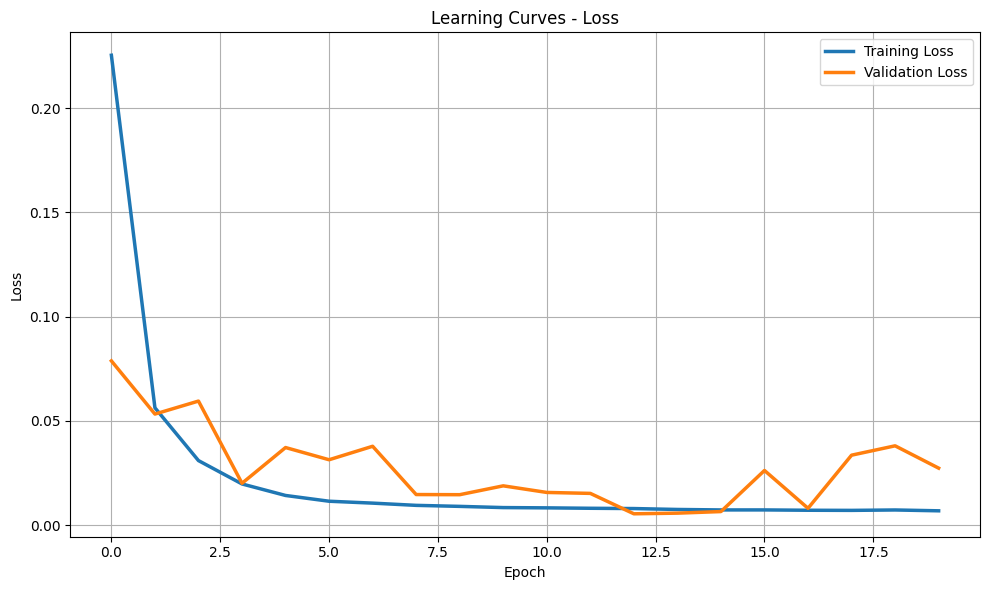

In [51]:
# Visualise the loss curves
if 'loss' in scce_history.history:
    plt.figure(figsize=(10, 6))
    plt.plot(scce_history.history['loss'], label='Training Loss', linewidth=2.5)
    if 'val_loss' in scce_history.history:
        plt.plot(scce_history.history['val_loss'], label='Validation Loss', linewidth=2.5)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Learning Curves - Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

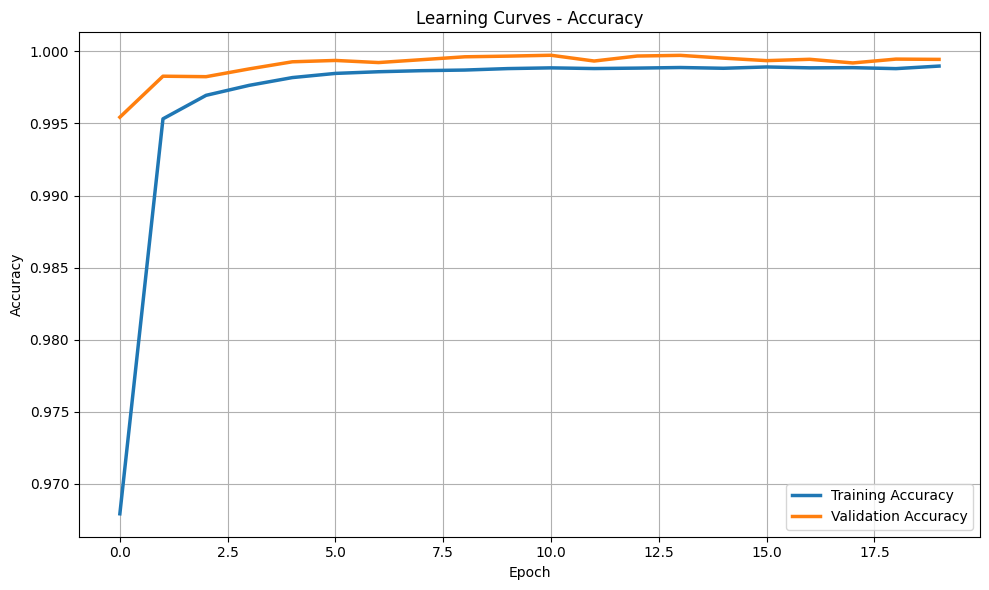

In [52]:
# Visualise the accuracy curve
if 'accuracy' in scce_history.history:
    plt.figure(figsize=(10, 6))
    plt.plot(scce_history.history['accuracy'], label='Training Accuracy', linewidth=2.5)
    if 'val_accuracy' in scce_history.history:
        plt.plot(scce_history.history['val_accuracy'], label='Validation Accuracy', linewidth=2.5)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves - Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [53]:
# Model predictions (probabilities for each class)

probabilities = scce_model.predict(X_test, verbose=1)

4688/4688 [==============================] - 36s 8ms/step


In [54]:
# Display the probabilities
print(probabilities)

[[1.5097250e-08 9.9613491e-09 5.7239038e-08 ... 1.7564501e-08
  1.8508170e-07 1.1386279e-10]
 [5.6087393e-09 2.8291787e-09 3.1330750e-08 ... 7.9657596e-09
  7.9481133e-08 4.7447518e-11]
 [5.4843463e-07 9.9999136e-01 5.2674579e-07 ... 3.3043108e-07
  1.3118701e-06 4.3418686e-07]
 ...
 [5.3691109e-09 1.2454299e-09 2.0750238e-06 ... 6.1693929e-05
  1.1007587e-04 5.2447640e-04]
 [3.7736081e-07 9.9999410e-01 4.0880019e-07 ... 2.0414129e-07
  8.3083341e-07 3.2893914e-07]
 [1.7803539e-07 9.9999720e-01 1.2561620e-07 ... 1.3972532e-07
  4.1956969e-07 1.8079902e-07]]


In [55]:
# Inspacting the probabilities
print("\nPredicted Probabilities: ")
print(probabilities[0])

print("\nArgmax: ")
print(np.argmax(probabilities[0]))


Predicted Probabilities: 
[1.5097250e-08 9.9613491e-09 5.7239038e-08 9.9999958e-01 2.5268998e-09
 1.9107587e-08 3.4582083e-08 3.5398979e-09 3.8727361e-08 1.7564501e-08
 1.8508170e-07 1.1386279e-10]

Argmax: 
3


In [56]:
print("\nPredicted Probabilities: ")
print(probabilities[1])

print("\nArgmax: ")
print(np.argmax(probabilities[1]))


Predicted Probabilities: 
[5.6087393e-09 2.8291787e-09 3.1330750e-08 9.9999970e-01 7.7233409e-10
 7.2951529e-09 3.5742641e-08 1.4348770e-09 2.2957417e-08 7.9657596e-09
 7.9481133e-08 4.7447518e-11]

Argmax: 
3


In [57]:
print("\nPredicted Probabilities: ")
print(probabilities[10])

print("\nArgmax: ")
print(np.argmax(probabilities[10]))


Predicted Probabilities: 
[8.1994704e-09 3.3873433e-09 4.2653276e-08 9.9999970e-01 1.0428375e-09
 9.7088133e-09 3.4350030e-08 1.9663309e-09 2.5794691e-08 9.7381898e-09
 1.0754760e-07 6.1749161e-11]

Argmax: 
3


In [58]:
print("\nPredicted Probabilities: ")
print(probabilities[1000])

print("\nArgmax: ")
print(np.argmax(probabilities[1000]))


Predicted Probabilities: 
[7.4770568e-08 9.9999863e-01 2.4085589e-08 4.5091948e-09 4.7980768e-07
 1.0646328e-08 2.1027337e-07 1.7259715e-08 3.8391641e-09 1.4441903e-07
 1.9431980e-07 9.5848122e-08]

Argmax: 
1


In [59]:
print("\nPredicted Probabilities: ")
print(probabilities[3200])

print("\nArgmax: ")
print(np.argmax(probabilities[3200]))


Predicted Probabilities: 
[1.3349253e-07 9.9999756e-01 5.5653590e-08 1.7491883e-08 1.0448379e-06
 3.9643560e-08 2.6835625e-07 2.6817624e-08 9.3212487e-09 2.4071431e-07
 4.3400078e-07 1.7661343e-07]

Argmax: 
1


### Step by step evaluation

In [60]:
y_pred_proba = scce_model.predict(X, verbose=1)

2025-12-08 08:01:30.669510: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 672000000 exceeds 10% of free system memory.


31250/31250 [==============================] - 192s 6ms/step


In [61]:
# Get the shape of Predicted Probabilities, y_test and y_true labels
print(f"Shape of predicted probabilities: {probabilities.shape}")
print(f"Shape of y_test: : {y_test.shape}")

Shape of predicted probabilities: (150000, 12)
Shape of y_test: : (150000,)


In [62]:
# Convert Probabilities to Integer Predictions (y_pred)
y_pred = np.argmax(probabilities, axis=1)

In [63]:
# Confirm the shape of y_pred
print(f"Shape of y_pred: : {y_pred.shape}")

Shape of y_pred: : (150000,)


### Classification Report

In [64]:
from sklearn.metrics import classification_report

print("Classification report: \n")
print(classification_report(y_test, y_pred, digits=4, target_names=class_names))

Classification report: 



                       precision    recall  f1-score   support

             Backdoor     0.9070    0.9750    0.9398        40
       Benign Traffic     1.0000    1.0000    1.0000     99261
      DDoS HTTP Flood     1.0000    0.9987    0.9993       744
   DDoS TCP SYN Flood     1.0000    1.0000    1.0000     39782
    OS Fingerprinting     1.0000    0.5714    0.7273         7
      Password Attack     0.9999    1.0000    0.9999      8448
        Port Scanning     1.0000    1.0000    1.0000       463
           Ransomware     1.0000    0.8667    0.9286        30
        SQL Injection     0.8960    0.9975    0.9441       406
     Uploading Attack     1.0000    0.9865    0.9932       445
Vulnerability Scanner     0.9185    0.8199    0.8664       261
                  XSS     1.0000    0.9292    0.9633       113

             accuracy                         0.9995    150000
            macro avg     0.9768    0.9287    0.9468    150000
         weighted avg     0.9995    0.9995    0.9995 

### Multiclass Classification Metrics (for multiclass, use `average=weighted`)

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1_score =f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1_score:.4f}")

Accuracy:  0.9995
Precision: 0.9995
Recall:    0.9995
F1 Score:  0.9995


In [66]:
# # Ignoring the average
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1_score =f1_score(y_test, y_pred)

# print(f"Accuracy:  {accuracy:.4f}")
# print(f"Precision: {precision:.4f}")
# print(f"Recall:    {recall:.4f}")
# print(f"F1 Score:  {f1_score:.4f}")

### Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[   39,     0,     0,     0,     0,     1,     0,     0,     0,
            0,     0,     0],
       [    0, 99257,     0,     0,     0,     0,     0,     0,     0,
            0,     4,     0],
       [    0,     0,   743,     0,     0,     0,     0,     0,     0,
            0,     1,     0],
       [    0,     0,     0, 39782,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     3,     0,     0,     4,     0,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,  8448,     0,     0,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     0,   463,     0,     0,
            0,     0,     0],
       [    4,     0,     0,     0,     0,     0,     0,    26,     0,
            0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,   405,
            0,     1,     0],
       [    0,     1,     0,     0,     0,     0,     0,     0,     0,
          439,     5

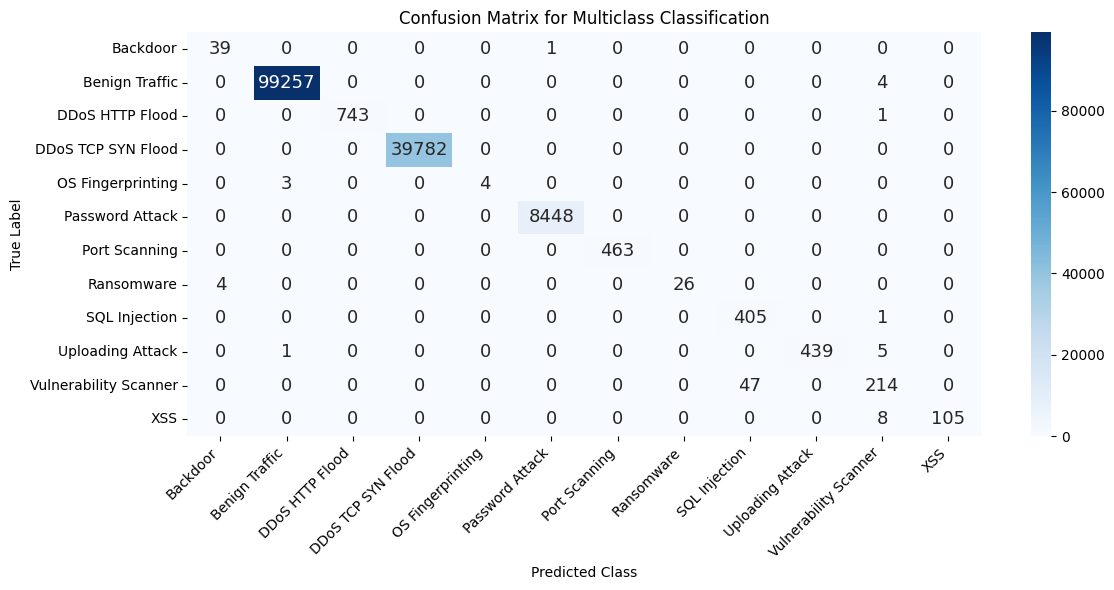

In [68]:
## Visualising the Confusion Matrix
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
            xticklabels=class_names, yticklabels=class_names,
           annot_kws={"fontsize":13})
plt.xlabel("Predicted Class")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Multiclass Classification")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### ROC-AUC and ROC Curves

In [69]:
n_classes = len(class_counts)

In [70]:
print(f"Shape of y_test: {y_test.shape}")
print(f"\nShape of Probabilities: {probabilities.shape}")

Shape of y_test: (150000,)

Shape of Probabilities: (150000, 12)


In [71]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

#### Binarize Labels

In [72]:
from sklearn.preprocessing import label_binarize

classes = np.unique(y_test)
y_test_binarize = label_binarize(y_test, classes=classes)

In [73]:
# Verify the binarized output, y_test_binarized should be one-hot encoded
y_test_binarize[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [74]:
# This corresponds to the position of the one-hot encoded y_test_binarize
y_test[0]

3

In [75]:
y_test_binarize[1000]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [76]:
y_test[1000]

1

#### ROC and AUC Per Class

In [77]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

n_classes = len(classes)
print(n_classes)

12


In [78]:
# Compute FPR, TPR, and ROC-AUC per class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

**Verify the `fpr`, `tpr`, `roc_auc`**

In [79]:
fpr[0]

array([0.        , 0.        , 0.        , ..., 0.99657909, 0.99991331,
       1.        ])

In [80]:
tpr[0]

array([0.   , 0.075, 0.975, ..., 1.   , 1.   , 1.   ])

In [81]:
roc_auc[0]

0.9990987596692452

#### Micro and Macro ROC-AUC

In [82]:
from sklearn.metrics import roc_auc_score

# Get Micro ROC-AUC
roc_auc_micro = roc_auc_score(y_test_binarize, probabilities, average="micro")
print(f"ROC-AUC Micro: {roc_auc_micro}")

ROC-AUC Micro: 0.9999927308686868


In [83]:
# Get Macro ROC-AUC
roc_auc_macro = roc_auc_score(y_test_binarize, probabilities, average="macro")
print(f"ROC-AUC Macro: {roc_auc_macro}")

ROC-AUC Macro: 0.9998073910353468


#### Plotting ROC Curve (for each class)

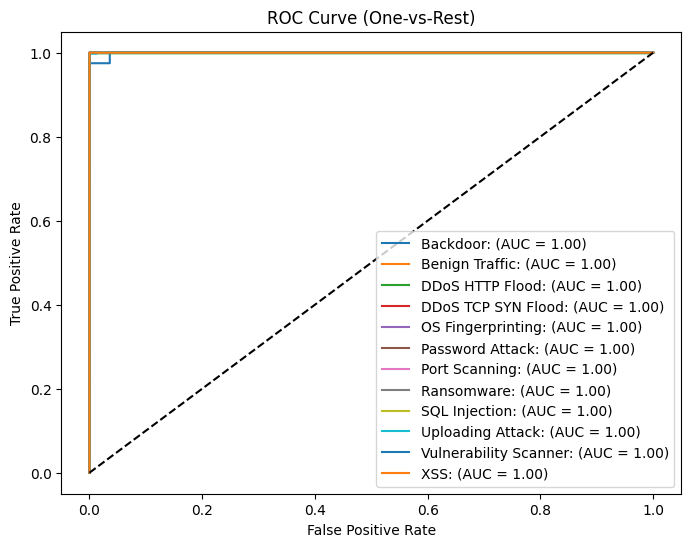

In [84]:
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]}: (AUC = {roc_auc[i]:0.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()

### PR Curve and PR-AUC

In [85]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision = dict()
recall = dict()
pr_auc = dict()

In [86]:
# Compute Precision, Recall and PR-AUC per class
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarize[:, i],
                                                        probabilities[:, i])
    pr_auc[i] = average_precision_score(y_test_binarize[:, i], probabilities[:, i])

In [87]:
## Compute Micro & Macro PR-AUC
pr_auc_micro = average_precision_score(y_test_binarize, 
                                       probabilities,
                                       average='micro')

pr_auc_macro = average_precision_score(y_test_binarize, 
                                       probabilities,
                                       average='macro')

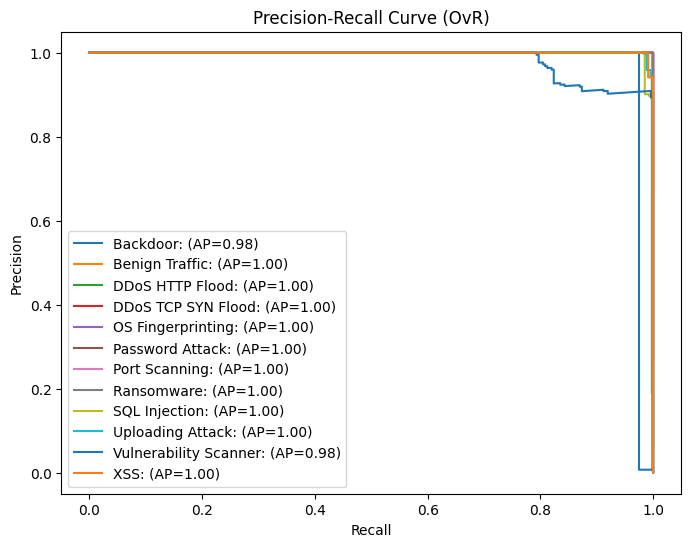

In [88]:
# Plotting PR Curves
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f"{class_names[i]}: (AP={pr_auc[i]:0.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (OvR)')
plt.legend()
plt.show()